# The Sparks Foundation

## Name: Yash K Jain


## Task 1: Prediction using Supervised ML

### >_Predict the percentage of marks of an student based on the number of study hours._

### STEP 1 - Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("http://bit.ly/w-data")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### STEP 2 - Data Visualization

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


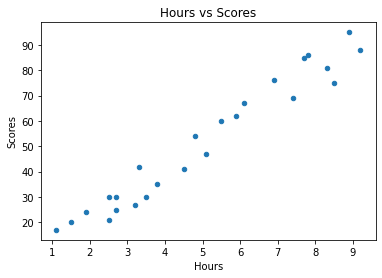

In [5]:
df.plot(x="Hours",y="Scores",style="bo",kind="scatter")
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


### STEP 3 - Splitting Dataset

In [11]:
y = df[['Scores']]
X = df.drop(['Scores'], axis=1) 

In [12]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [13]:
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


### STEP 4 - Training the model

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression  

lr = LinearRegression()  
lr = lr.fit(X_train, y_train)

In [22]:
print('coefficient/slope', lr.coef_)
print('intercept', lr.intercept_)

coefficient/slope [[9.78856669]]
intercept [2.37081538]


### STEP 5 - Model Visualization 

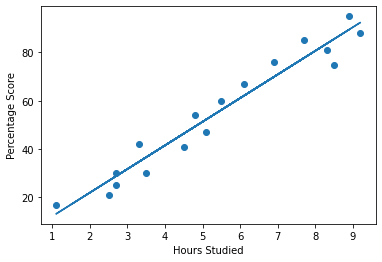

In [25]:
# Plotting the regression line
line = lr.coef_ * X + lr.intercept_

# Plotting the train data and the model
plt.figure()
plt.scatter(X_train, y_train)
plt.plot(X, line);
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

### STEP 6 - Predicting Test Dataset

In [26]:
y_pred = lr.predict(X_test)
y_pred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [34]:
df2 = pd.DataFrame(zip(y_test.values, y_pred), columns=['actual', 'predicted'])
df2

,actual,predicted
0,[20],[17.05366541246545]
1,[27],[33.69422877993883]
2,[69],[74.80620886428483]
3,[30],[26.8422320992145]
4,[62],[60.12335883416126]
5,[35],[39.56736879198826]
6,[24],[20.96909208716507]
7,[86],[78.72163553898443]


In [35]:
hours = 9.25
score_predicted = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(score_predicted[0]))

No of Hours = 9.25
Predicted Score = [92.91505723]


### STEP 7 - Model Evaluatation

In [39]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.419727808027652


### *Therefore,the predicted score of a student who studies for _9.25_ hrs/day is :*
### *_92.91505723_*